 ##                           Final Project Group 10

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We’re Group 10, and today we’re here to present our final project. Our professor tasked us with doing some 'data science'—emphasis on the science—so we delved into the world of CO2 emissions. Using the skills we picked up this semester, we collected data, formulated hypotheses, and built models to analyze and validate our findings.


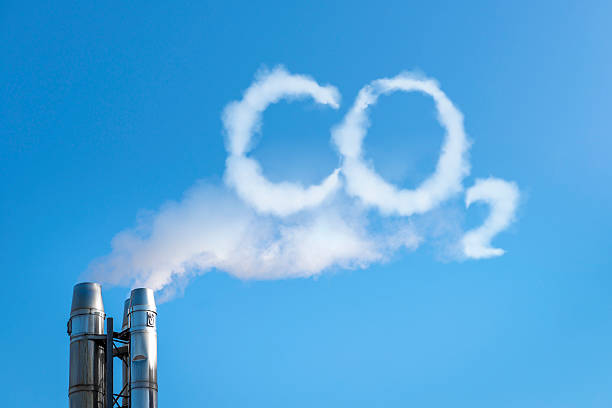

In [6]:
df1 = pd.read_csv("disasters.csv")

In [8]:
df2 = pd.read_csv("co2.csv")

In [10]:
df1.head()

,Entity,Code,Year,Disasters
0,All disasters,NaN,1900,6
1,All disasters,NaN,1901,1
2,All disasters,NaN,1902,10
3,All disasters,NaN,1903,12
4,All disasters,NaN,1904,4


In [12]:
df2.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [14]:
dis_df = df1.drop(columns=['Code'])
dis_df2 = dis_df[dis_df['Entity'] == 'All disasters excluding earthquakes']
dis_df3 = dis_df2[(dis_df2['Year'] >= 1920) & (dis_df2['Year'] <= 2023)]
dis_df3 = dis_df3.dropna()
dis_df3.reset_index(drop=True, inplace=True)
dis_df3.head()


,Entity,Year,Disasters
0,All disasters excluding earthquakes,1920,5
1,All disasters excluding earthquakes,1921,2
2,All disasters excluding earthquakes,1922,5
3,All disasters excluding earthquakes,1923,8
4,All disasters excluding earthquakes,1924,2


In [16]:
co2_df = df2[df2['Entity'] == 'World']
co2_df = co2_df.drop(columns=['Code'])
co2_df = co2_df[co2_df['Year'] >= 1920]
co2_df = co2_df.drop_duplicates()
co2_df = co2_df.dropna()
co2_df['Annual CO₂ emissions'] = pd.to_numeric(co2_df['Annual CO₂ emissions'], errors='coerce')
co2_df.reset_index(drop=True, inplace=True)
co2_df.head()

,Entity,Year,Annual CO₂ emissions
0,World,1920,3.537837e+09
1,World,1921,3.106184e+09
2,World,1922,3.254463e+09
3,World,1923,3.690698e+09
4,World,1924,3.702777e+09


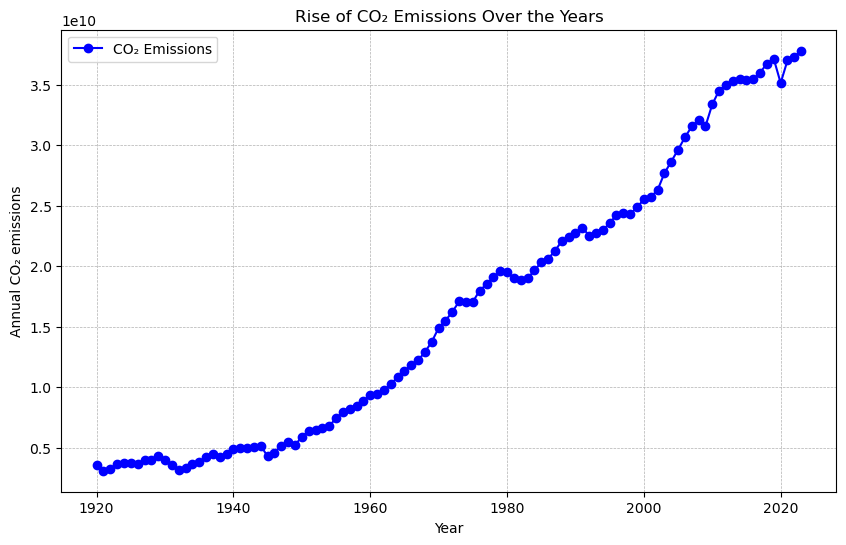

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(co2_df['Year'], co2_df['Annual CO₂ emissions'], marker='o', linestyle='-', color='blue', label='CO₂ Emissions')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions')
plt.title('Rise of CO₂ Emissions Over the Years')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

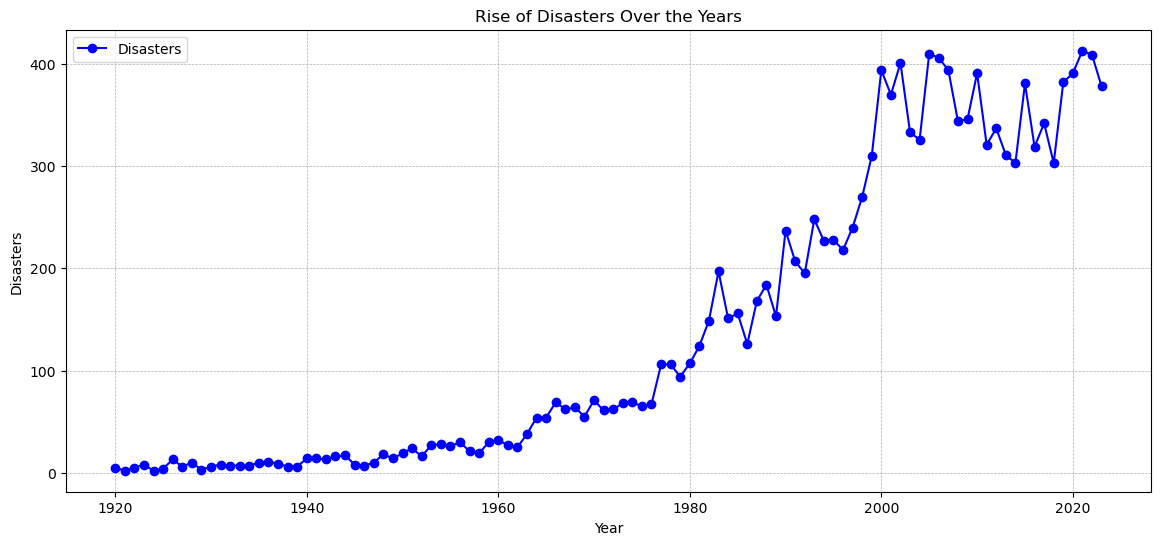

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(dis_df3['Year'], dis_df3['Disasters'], marker='o', linestyle='-', color='blue', label='Disasters')
plt.xlabel('Year')
plt.ylabel('Disasters')
plt.title('Rise of Disasters Over the Years')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

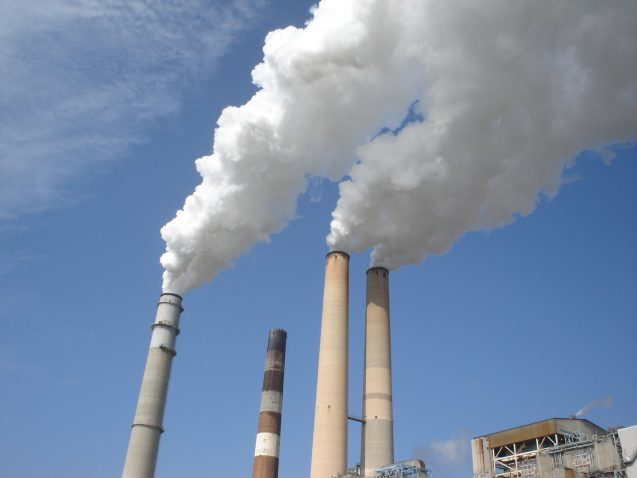

from IPython.display import FileLink

# Save the DataFrame as CSV
dis_df3.to_csv('final_disaster.csv', index=False)

co2_df.to_csv('final_co2.csv', index=False)

In [25]:
dis_rows = len(dis_df3)
print(dis_rows)

104


In [27]:
co2_rows = len(co2_df)
print(co2_rows)

104


In [29]:
# Merge the datasets on 'Year' using an inner join (only matching years will be kept)
final_df = pd.merge(dis_df3, co2_df, on='Year', how='inner')

# Reset index to keep it clean
final_df.reset_index(drop=True, inplace=True)

# Display the first 5 rows of the merged dataset
print("Merged Dataset (Disaster + CO2):")
print(final_df.head())

Merged Dataset (Disaster + CO2):
                              Entity_x  Year  Disasters Entity_y  \
0  All disasters excluding earthquakes  1920          5    World   
1  All disasters excluding earthquakes  1921          2    World   
2  All disasters excluding earthquakes  1922          5    World   
3  All disasters excluding earthquakes  1923          8    World   
4  All disasters excluding earthquakes  1924          2    World   

   Annual CO₂ emissions  
0          3.537837e+09  
1          3.106184e+09  
2          3.254463e+09  
3          3.690698e+09  
4          3.702777e+09  


final_df.to_csv('final_df.csv', index=False)

In [32]:
merged_df = pd.merge(dis_df3[['Year', 'Disasters']], co2_df[['Year', 'Annual CO₂ emissions']], on='Year', how='inner')
print(final_df.head())

                              Entity_x  Year  Disasters Entity_y  \
0  All disasters excluding earthquakes  1920          5    World   
1  All disasters excluding earthquakes  1921          2    World   
2  All disasters excluding earthquakes  1922          5    World   
3  All disasters excluding earthquakes  1923          8    World   
4  All disasters excluding earthquakes  1924          2    World   

   Annual CO₂ emissions  
0          3.537837e+09  
1          3.106184e+09  
2          3.254463e+09  
3          3.690698e+09  
4          3.702777e+09  


merged_df.to_csv('final_df2.csv', index=False)

In [35]:
filtered_final_df = final_df[['Year', 'Disasters', 'Annual CO₂ emissions']]

# Reset index to keep it clean
filtered_final_df.reset_index(drop=True, inplace=True)
filtered_final_df.head(10)

,Year,Disasters,Annual CO₂ emissions
0,1920,5,3.537837e+09
1,1921,2,3.106184e+09
2,1922,5,3.254463e+09
3,1923,8,3.690698e+09
4,1924,2,3.702777e+09
5,1925,4,3.740634e+09
6,1926,13,3.677408e+09
7,1927,6,4.012947e+09
8,1928,10,3.996312e+09
9,1929,3,4.288212e+09


We then merge the two datasets for doing the analysis so that we can create more meaningful hypothesis and conduct data analysis and visualization.

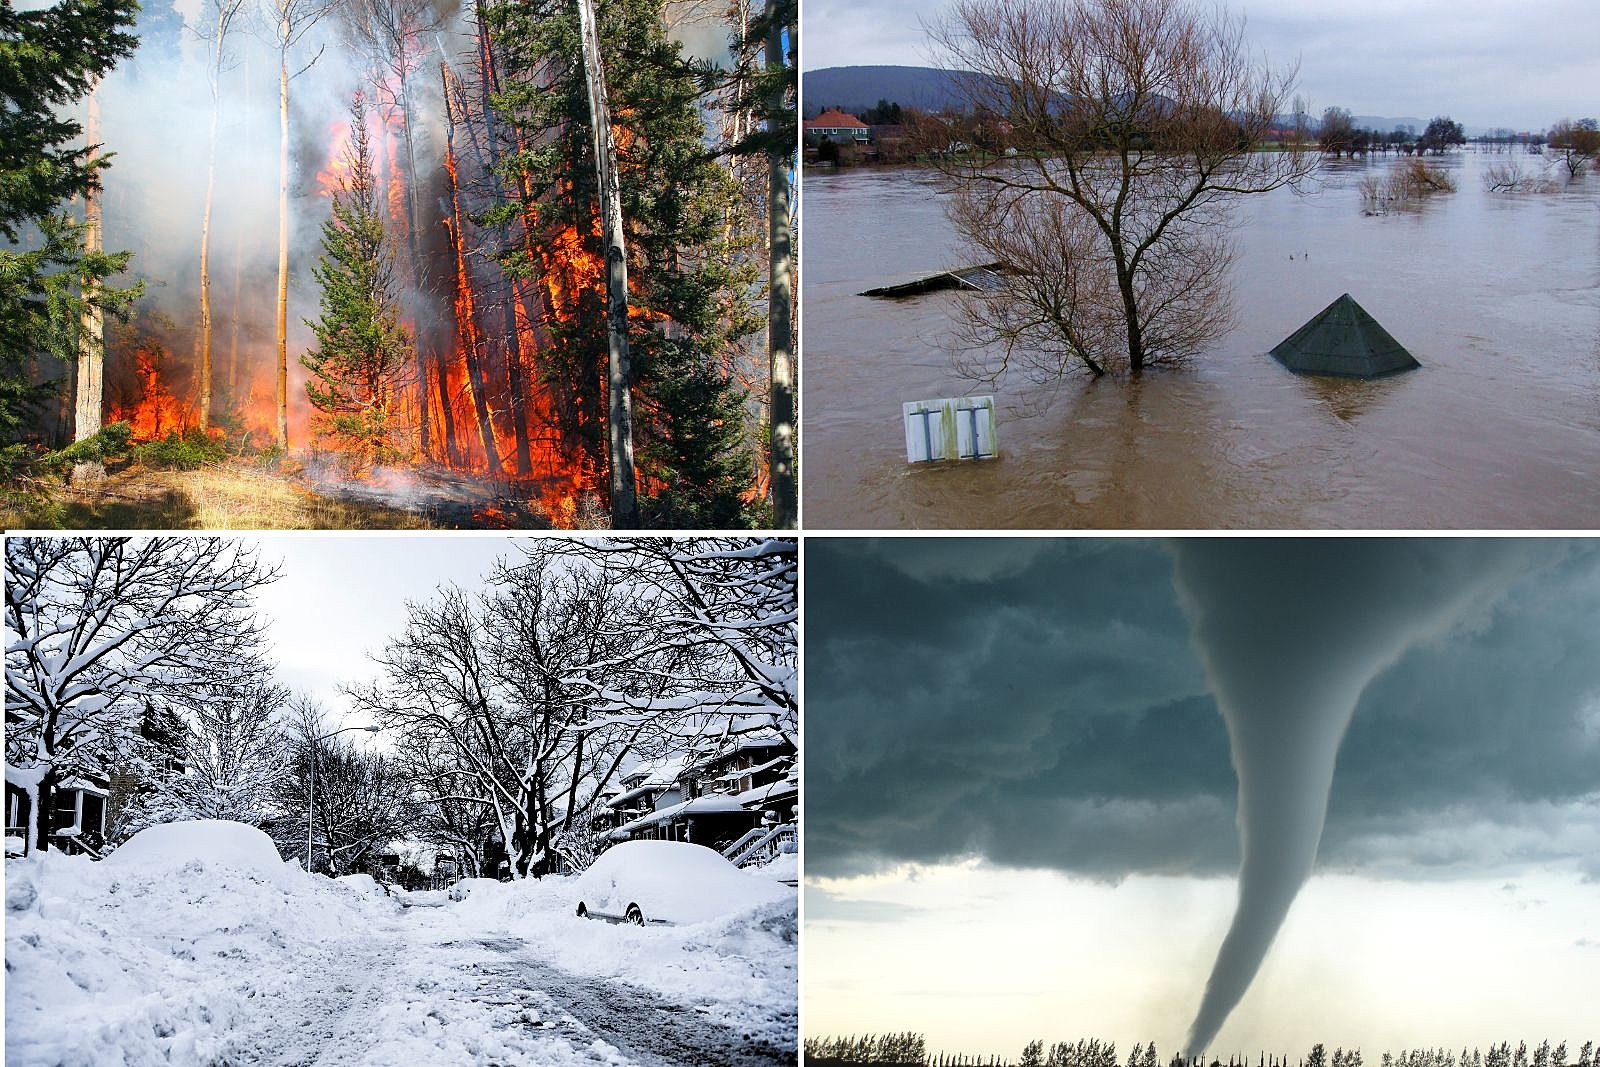

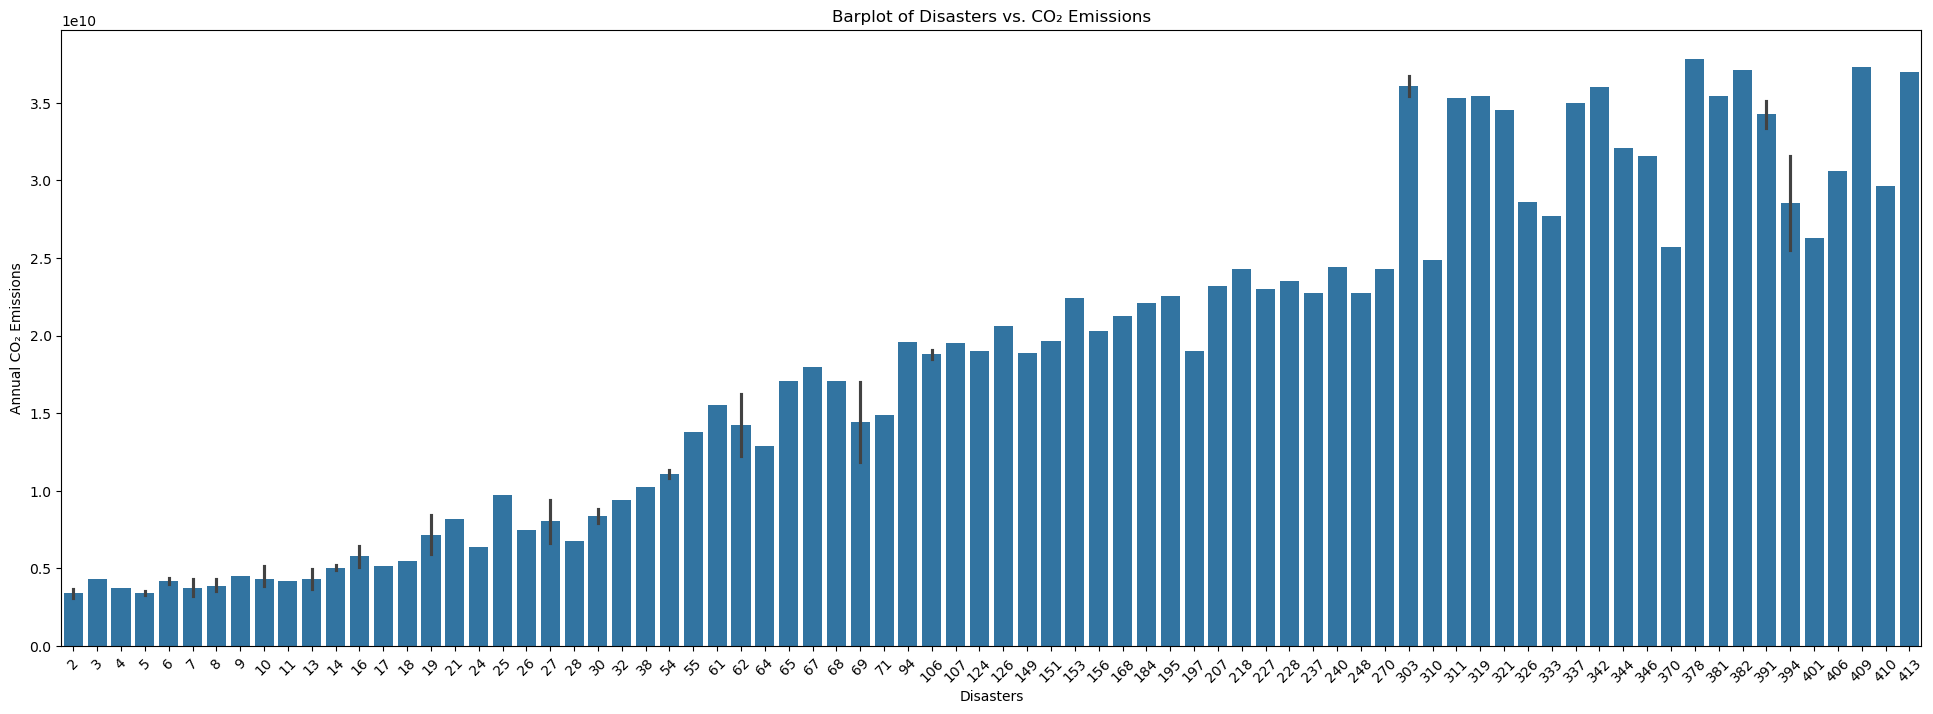

In [45]:
plt.figure(figsize=(24, 8))  # Set the figure size
sns.barplot(data=filtered_final_df, x=filtered_final_df["Disasters"], y=filtered_final_df["Annual CO₂ emissions"])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Barplot of Disasters vs. CO₂ Emissions')
plt.xlabel('Disasters')
plt.ylabel('Annual CO₂ Emissions')
plt.show()

/var/folders/69/804r_r110yn41_wtzgy7rq780000gn/T/ipykernel_6803/3898507772.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Annual CO₂ emissions', y='Disasters',  data=filtered_final_df, palette='rainbow')


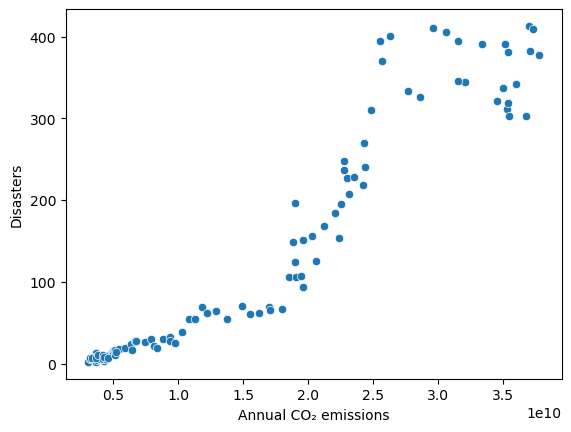

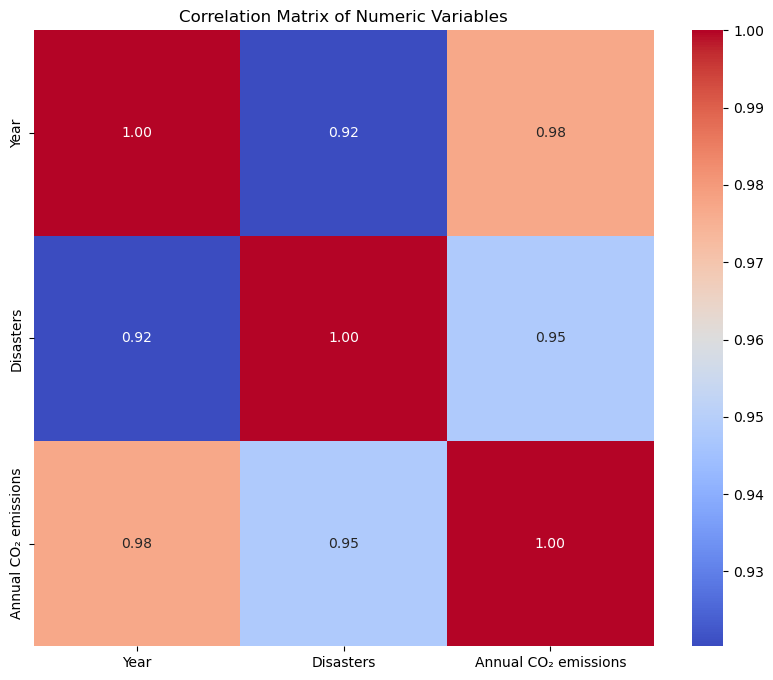

In [47]:
sns.scatterplot(x='Annual CO₂ emissions', y='Disasters',  data=filtered_final_df, palette='rainbow')

numeric_data = filtered_final_df.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

From the barplot, it is evident that an increase in emissions correlates with a higher frequency of disasters. The scatterplot demonstrates a widespread distribution of data points, suggesting that a polynomial curve would provide a better fit to the data. Lastly, the heatmap highlights a strong relationship between the frequency of disasters and annual CO₂ emissions, indicating a significant correlation.

## Hypothesis

Thus we can form our Hypothesis that as the number of Co2 Emissions Increases, The Frequency of Disaster Increases. Now we will try to prove it by a Linear Regression Model.

Model Coefficients:
Slope (m): 1.2266272624700152e-08
Intercept (c): -63.66556576477643
Mean Squared Error (MSE): 2150.273537580589
Root Mean Squared Error (RMSE): 46.37104201525548
R-squared (R²): 0.8952597545676534


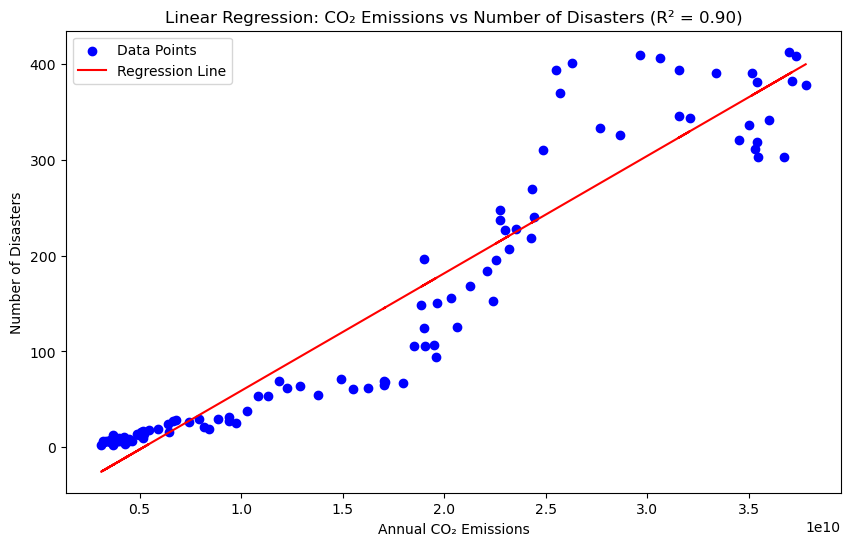

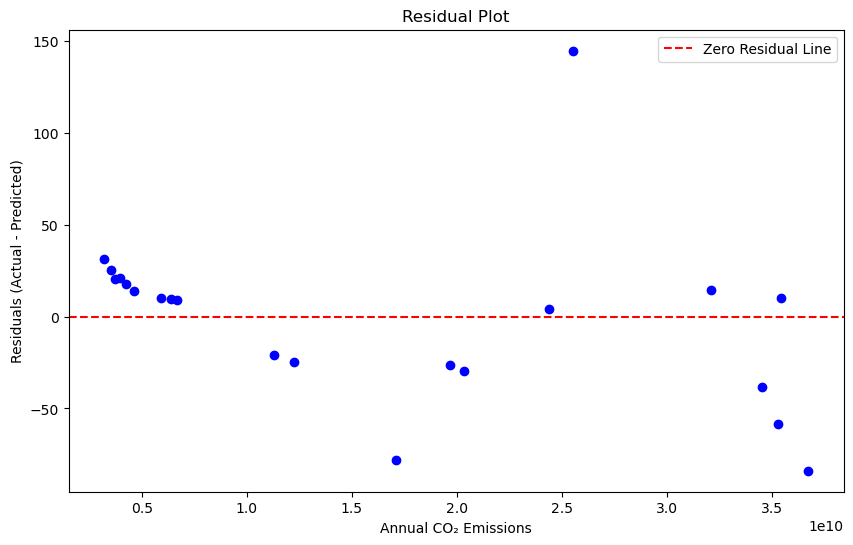

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare the Data
X = filtered_final_df[['Annual CO₂ emissions']]  # Independent variable (X)
y = filtered_final_df['Disasters']  # Dependent variable (y)

# Step 2: Split the Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 4: Get Model Coefficients
slope = regressor.coef_[0]
intercept = regressor.intercept_

print(f"Model Coefficients:")
print(f"Slope (m): {slope}")
print(f"Intercept (c): {intercept}")

# Step 5: Make Predictions on the Test Set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Step 7: Plot the Regression Line and Data Points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')
plt.xlabel('Annual CO₂ Emissions')
plt.ylabel('Number of Disasters')
plt.title(f'Linear Regression: CO₂ Emissions vs Number of Disasters (R² = {r2:.2f})')
plt.legend()
plt.show()

# Step 8: Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Annual CO₂ Emissions')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.legend()
plt.show()


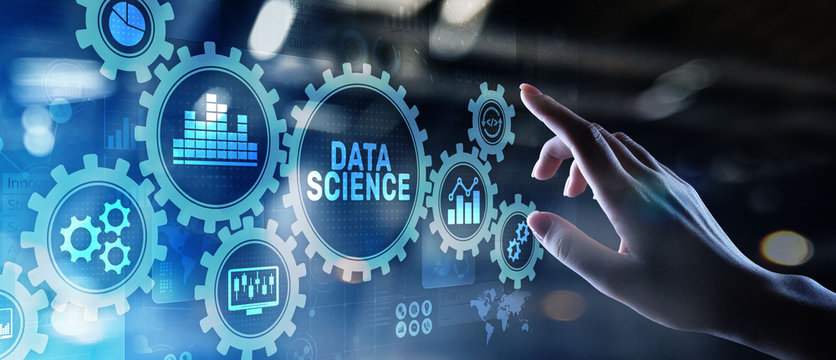

# Polynomial Regression
We will now try doing polynomial regression to see if it fits our model better


Model Coefficients (for degree 4): [ 0.00000000e+00  8.69713529e-40  2.34130068e-39  3.60413514e-29
 -7.74553161e-40]
Intercept: 1.1058766395842383
Mean Squared Error (MSE): 1624.2071147995198
Root Mean Squared Error (RMSE): 40.301453011020826
R-squared (R²): 0.9208845531213308


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


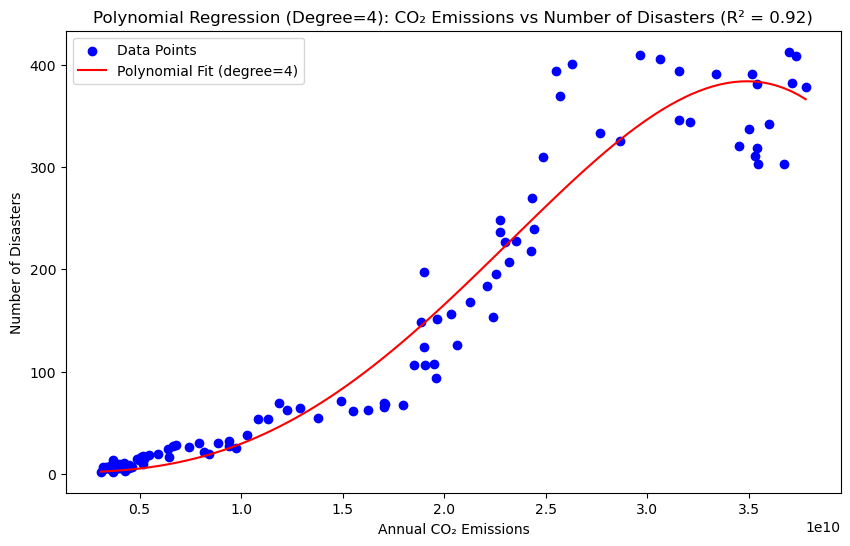

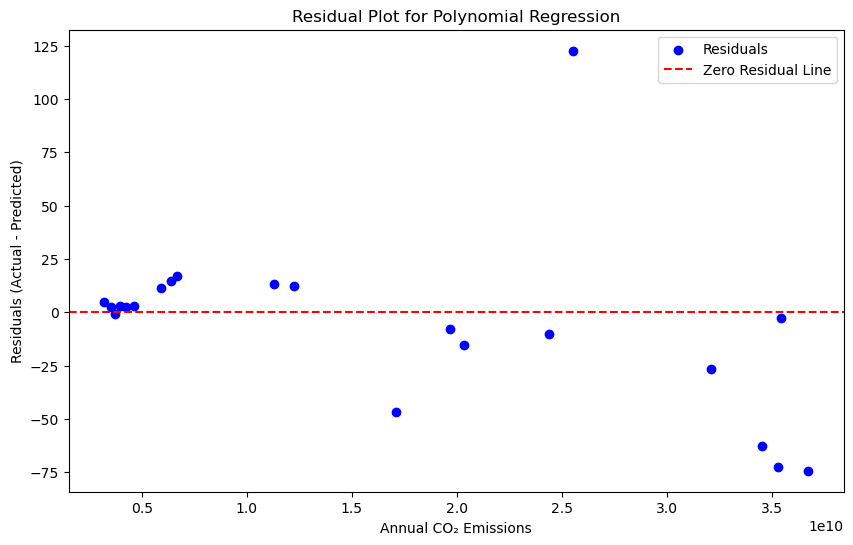

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare the Data
X = filtered_final_df[['Annual CO₂ emissions']]  # Independent variable (X)
y = filtered_final_df['Disasters']  # Dependent variable (y)

# Step 2: Split the Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Transform the Features for Polynomial Regression (degree=2, but you can try degree=3 or 4)
poly = PolynomialFeatures(degree=4)  # You can change the degree here
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Step 4: Train the Polynomial Regression Model
regressor = LinearRegression()
regressor.fit(X_poly_train, y_train)

# Step 5: Get Model Coefficients
coefficients = regressor.coef_
intercept = regressor.intercept_

print(f"Model Coefficients (for degree 4): {coefficients}")
print(f"Intercept: {intercept}")

# Step 6: Make Predictions on the Test Set
y_pred = regressor.predict(X_poly_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Step 8: Plot the Polynomial Regression Curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_poly_plot = poly.transform(X_plot)
y_plot = regressor.predict(X_poly_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Fit (degree=4)')
plt.xlabel('Annual CO₂ Emissions')
plt.ylabel('Number of Disasters')
plt.title(f'Polynomial Regression (Degree=4): CO₂ Emissions vs Number of Disasters (R² = {r2:.2f})')
plt.legend()
plt.show()

# Step 9: Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Annual CO₂ Emissions')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Polynomial Regression')
plt.legend()
plt.show()


We have fitted the Polynomial Regression with Degree of 4. Since the dataset shows some non linear relationship. We observe that the polynomial Regression Curve fits the point more accurately and the R Squared value for the Polynomial Curve is Slightly better than the Linear Regression Curve.

# Experiment - Tried incorporating additional 'Temperature' feature.
We wanted to check if adding additional feature like the rise in temperature would improve the model or not. We will do multiple linear regression since there are multiple features.


In [71]:
tempdf = pd.read_csv("temp_data.csv")

In [73]:
temp_rows = len(tempdf)
print(temp_rows)

104


In [75]:
final_df2 = pd.merge(filtered_final_df, tempdf, on='Year', how='inner')

In [77]:
final_df2.head()

,Year,Disasters,Annual CO₂ emissions,Temperature Anomaly (*C)
0,1920,5,3.537837e+09,-0.37
1,1921,2,3.106184e+09,-0.14
2,1922,5,3.254463e+09,-0.12
3,1923,8,3.690698e+09,-0.03
4,1924,2,3.702777e+09,-0.34


final_df2.to_csv('final_data.csv', index=False)

Model Coefficients: [1.07162669e-08 5.49137774e+01]
Intercept: -51.36181858946455
R-squared (R²): 0.8912366051442826
Mean Squared Error (MSE): 2232.867116649435
Root Mean Squared Error (RMSE): 47.25322334666107


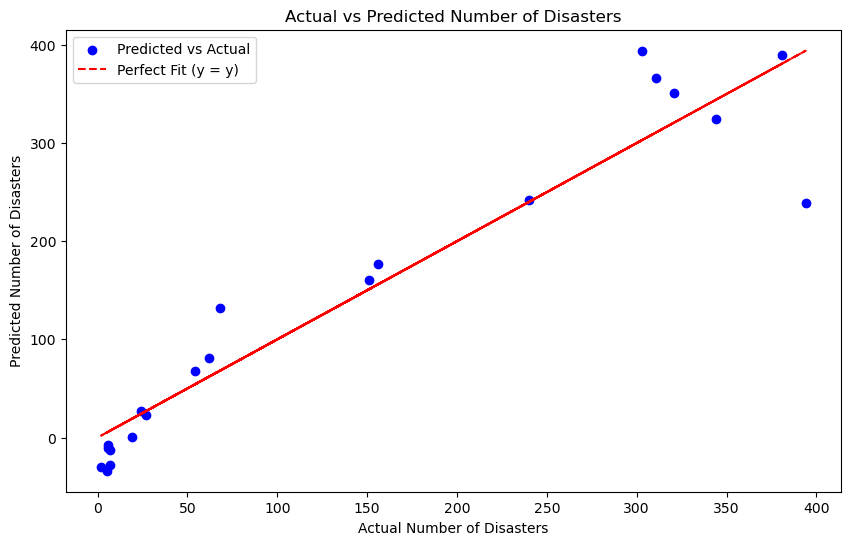

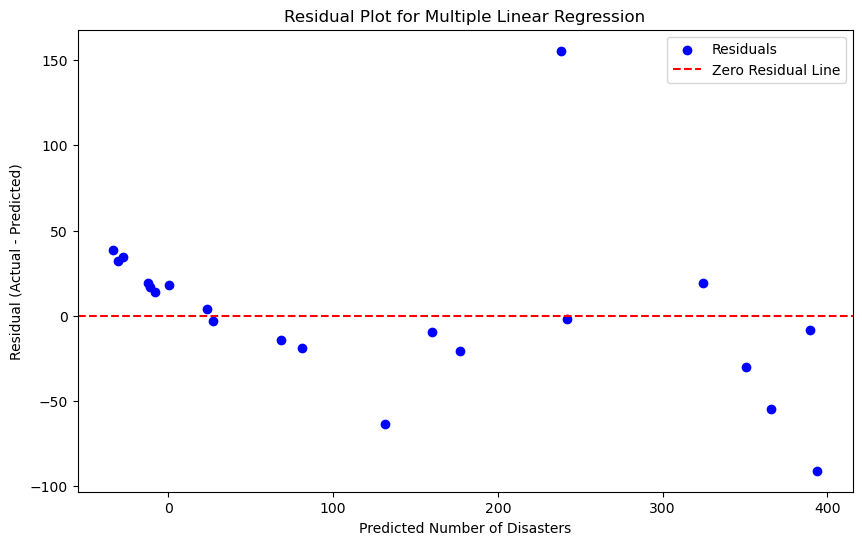

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Step 2: Define independent (X) and dependent (y) variables
X = final_df2[['Annual CO₂ emissions', 'Temperature Anomaly (*C)']]
y = final_df2['Disasters']

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Multiple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Get model coefficients, intercept, and predictions
coefficients = regressor.coef_
intercept = regressor.intercept_

# Step 6: Make predictions on the test set
y_pred = regressor.predict(X_test)

# Step 7: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Print model summary
print(f"Model Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"R-squared (R²): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 8: Plot the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit (y = y)')
plt.xlabel('Actual Number of Disasters')
plt.ylabel('Predicted Number of Disasters')
plt.title('Actual vs Predicted Number of Disasters')
plt.legend()
plt.show()

# Step 9: Plot the residuals (errors) to check for patterns
residuals = y_test - y_pred  # Residual = Actual - Predicted

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Number of Disasters')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot for Multiple Linear Regression')
plt.legend()
plt.show()


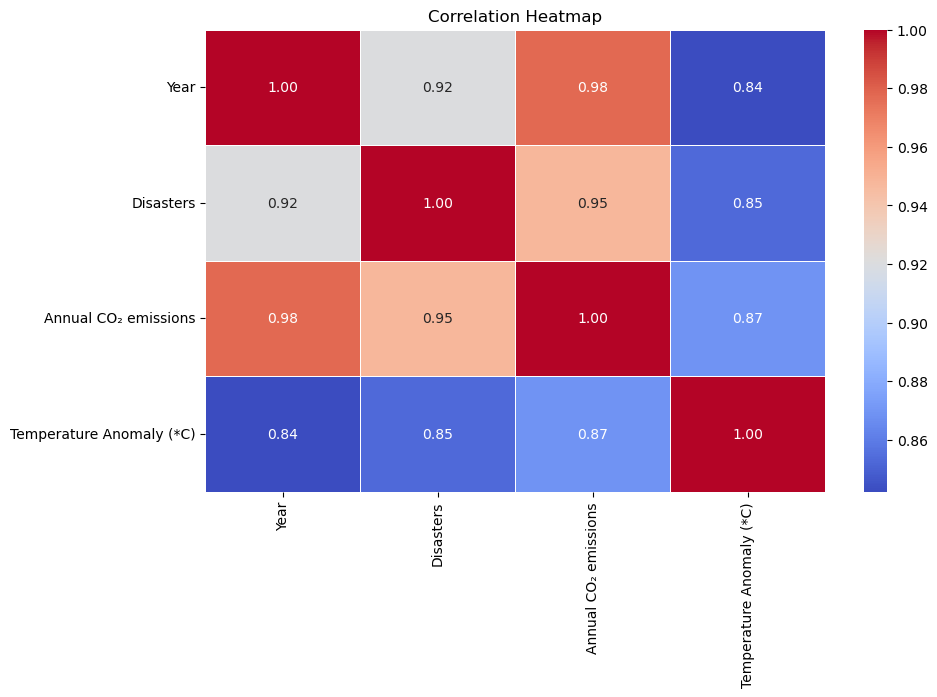

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = final_df2.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Since we can see a high collinearity (more than 0.7) between Co2 emissions and temperature, it indicates that this is not a good model because of unstable coefficients.

# Now, we will try to predict future disasters based on our model.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit (y = y)')
plt.xlabel('Actual Number of Disasters')
plt.ylabel('Predicted Number of Disasters')
plt.title('Actual vs Predicted Number of Disasters')
plt.legend()
plt.show()


Year: 2024, CO₂ Emissions: 36,000,000,000, Predicted Disasters: 388.62
Year: 2025, CO₂ Emissions: 37,000,000,000, Predicted Disasters: 398.10
Year: 2026, CO₂ Emissions: 38,000,000,000, Predicted Disasters: 406.76
Year: 2027, CO₂ Emissions: 39,000,000,000, Predicted Disasters: 414.54


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


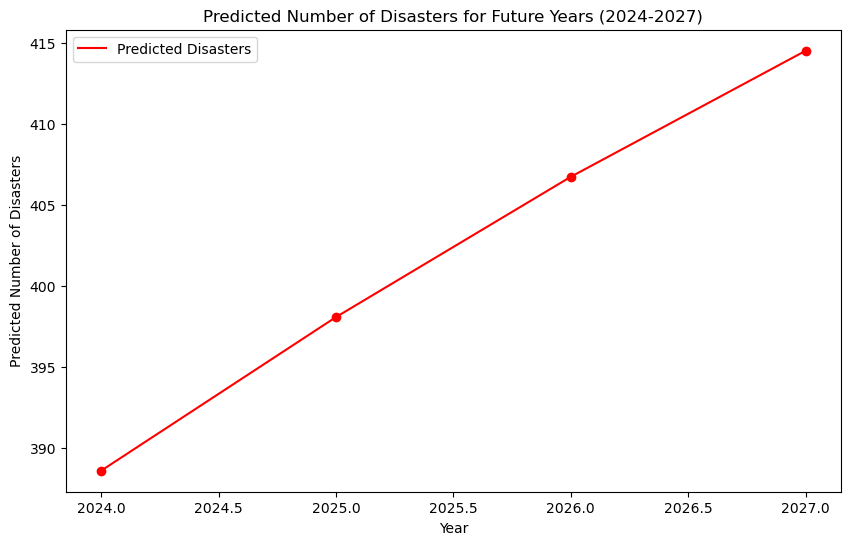

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Step 2: Define independent (X) and dependent (y) variables
X = filtered_final_df[['Annual CO₂ emissions']]  # Feature
y = filtered_final_df['Disasters']  # Target

# Step 3: Apply Polynomial Features (degree 3)
degree = 3  # You can change this to 2, 3, 4, etc.
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Step 4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 5: Train the Polynomial Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 6: Predict for new CO₂ emission values
# Future CO₂ emissions (for future years like 2024, 2025, 2026)
future_emissions = np.array([[36000000000],  # CO₂ emissions for 2024
                             [37000000000],  # CO₂ emissions for 2025
                             [38000000000],  # CO₂ emissions for 2026
                             [39000000000]])  # CO₂ emissions for 2027

# Step 7: Apply polynomial transformation to future CO₂ emissions
X_future_poly = poly.transform(future_emissions)

# Step 8: Use the trained model to predict the number of disasters
future_predictions = regressor.predict(X_future_poly)

# Print future predictions
future_years = [2024, 2025, 2026, 2027]
for year, emission, pred in zip(future_years, future_emissions, future_predictions):
    print(f"Year: {year}, CO₂ Emissions: {emission[0]:,}, Predicted Disasters: {pred:.2f}")

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(future_years, future_predictions, color='red', label='Predicted Disasters')
plt.scatter(future_years, future_predictions, color='red')
plt.xlabel('Year')
plt.ylabel('Predicted Number of Disasters')
plt.title('Predicted Number of Disasters for Future Years (2024-2027)')
plt.legend()
plt.show()


We create a sample data and then test our data for 4 susbsequent years. The Graph Proves our hypothesis that as the number of emissions increases the frequency of natural disasters increases.

## Conclusion

The chart illustrates the impact of CO₂ emissions on natural disaster trends over time. The following key points can be observed:

CO₂ Emissions (Red Line): This line shows the growth of annual CO₂ emissions (in billion metric tons) over the years.
Number of Disasters (Blue Line): This line tracks the total number of natural disasters recorded each year.
As CO₂ emissions increase, the number of natural disasters also shows an upward trend, suggesting a potential relationship between the two vari
Over the years, as CO₂ emissions have increased, the frequency of natural disasters like floods, wildfires, and extreme weather events has also risen. Our analysis shows that this is not a coincidence — there is a clear connection between the two.

Using data from 1920 to the present, we built models to study this relationship. We tried both a linear model (a straight line) and a polynomial model (a curve) to see which one fits the data better. The polynomial model fit the data much more accurate.

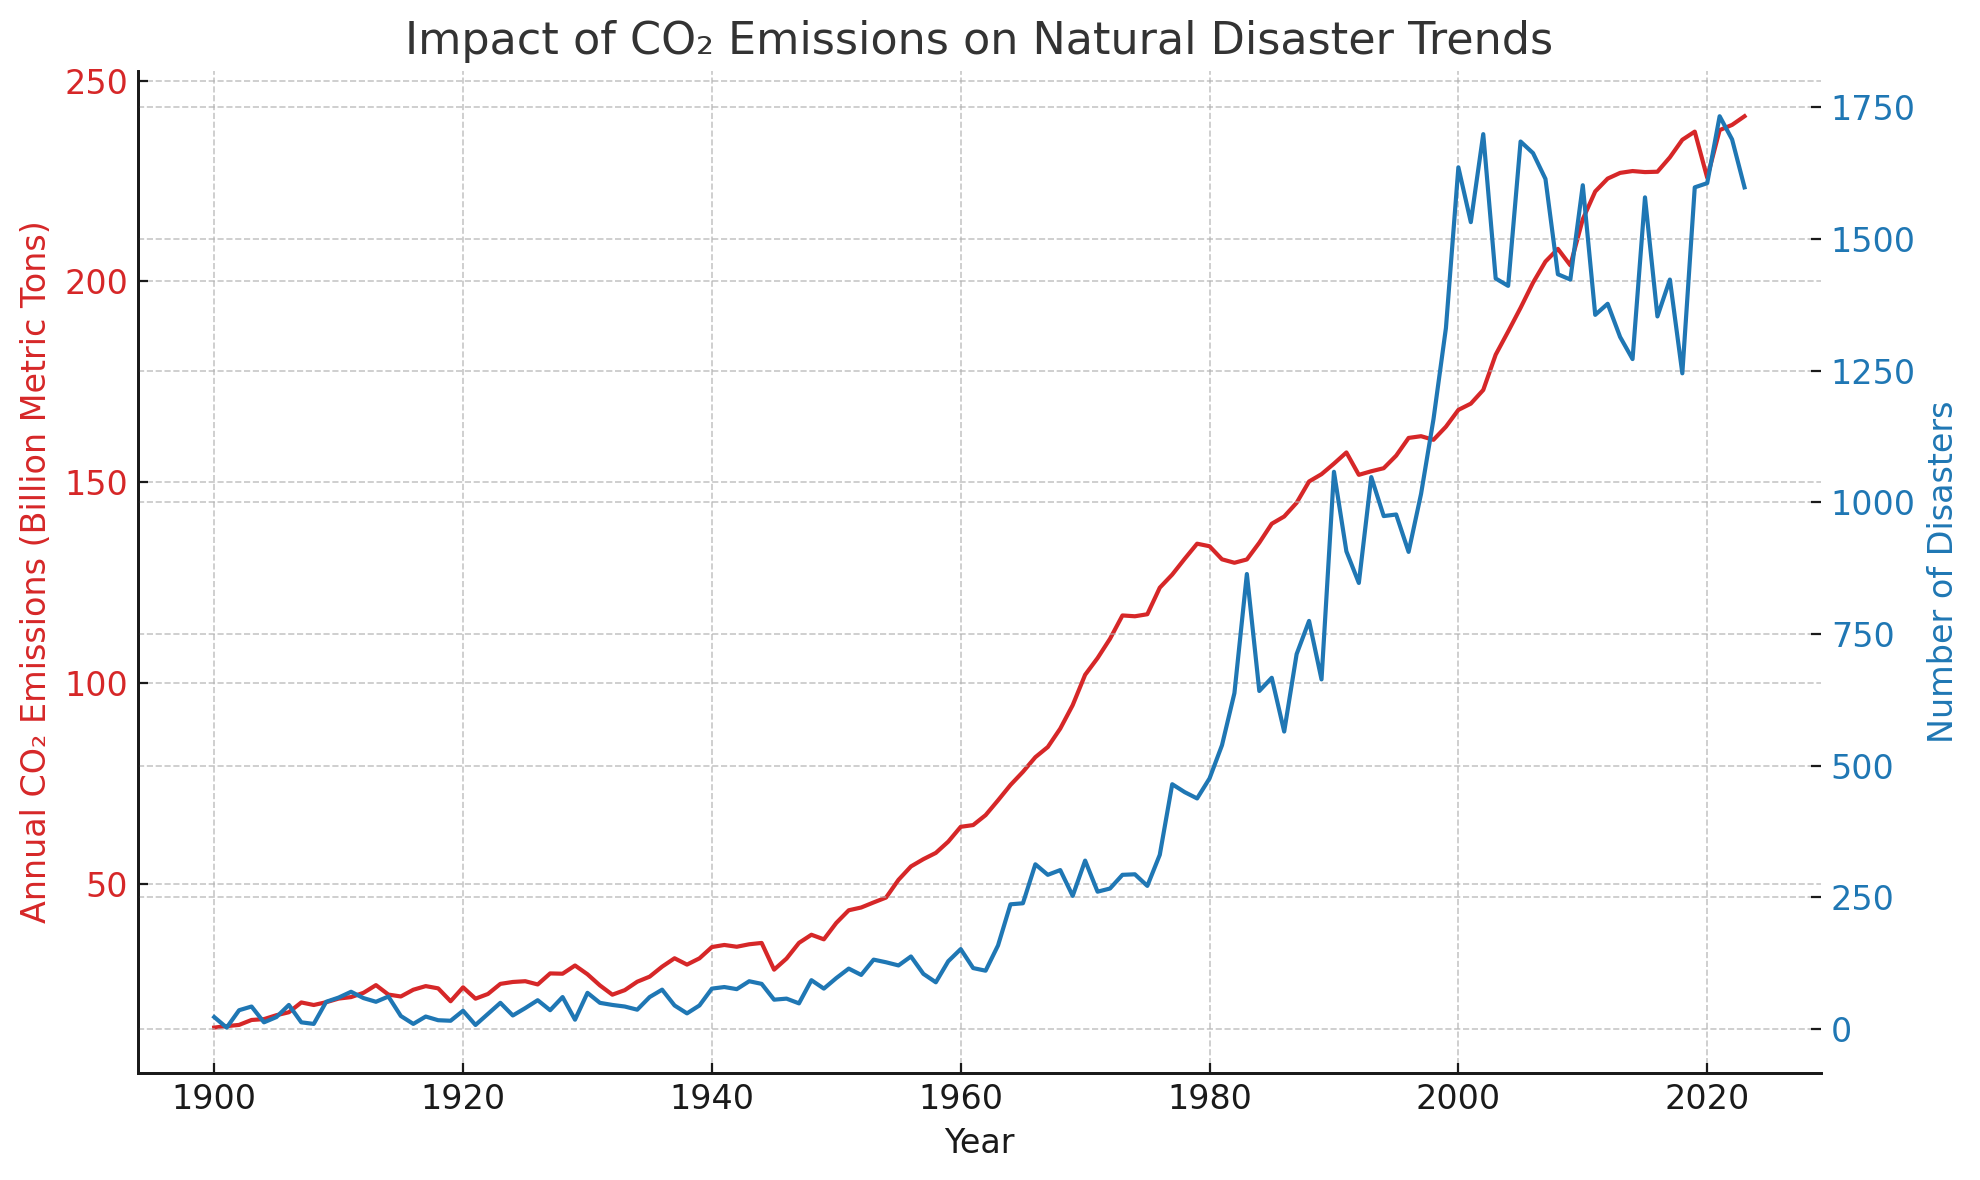

Over the years, as CO₂ emissions have increased, the frequency of natural disasters like floods, wildfires, and extreme weather events has also risen. Our analysis shows that this is not a coincidence — there is a clear connection between the two.
Using data from 1920 to the present, we built models to study this relationship. We tried both a linear model (a straight line) and a polynomial model (a curve) to see which one fits the data better. The polynomial model fit the data much more accurately, suggesting that the relationship between CO₂ and disasters is non-linear — meaning that small increases in CO₂ can cause larger increases in the number of disasters.
Key Takeaways:
More CO₂ = More Disasters: As CO₂ levels rise, the number of natural disasters increases significantly. For example, if CO₂ emissions increase from 36 billion tons to 39 billion tons, we predict the number of natural disasters will rise from 388 to 414 within a few years.

Accuracy of Our Prediction: Our model is very reliable — it explains about 92% of the variation in disaster frequency using just CO₂ data. This strong connection shows that controlling CO₂ emissions could help reduce the number of natural disasters.
What This Means for Us: The more CO₂ we emit, the more likely we are to experience extreme weather events. This insight can be used by policymakers and governments to push for lower CO₂ emissions and better disaster preparedness.

The analysis reveals a significant correlation between CO₂ emissions and the frequency of natural disasters.
Using both Linear Regression and Polynomial Regression (degree 4) models, the study demonstrates that the number of natural disasters has increased in line with CO₂ emissions over time.
The R-squared (R²) value for the Polynomial Regression model is *0.9208*, indicating that over 92% of the variance in natural disaster frequency can be explained by CO₂ emissions.
The *R-squared (R²)* value for the Linear Regression model is 0.8952, indicating that CO₂ emissions alone explain about 89.5% of the variation in the number of disasters.


*Non-linear Nature of the Relationship*: The analysis found that a simple linear relationship does not capture the complexity of how CO₂ affects natural disasters. Therefore, a Polynomial Regression model (degree 4) was used to better represent the non-linear trend.

*CO₂ Emission Impact on Natural Disasters:*
For every 1 billion metric tons increase in CO₂ emissions, the predicted number of natural disasters increases by approximately 9 to 10 disasters.
The polynomial model predicts that by 2024 (when CO₂ emissions are projected to reach 36 billion metric tons), there will be approximately 388 disasters. By 2027 (when CO₂ emissions are projected to reach 39 billion metric tons), the number of natural disasters will increase to 414 disasters.
This represents an increase of approximately 6.7% in natural disasters over a 4-year period.
Polynomial Model Coefficients: The coefficients for the polynomial model demonstrate a complex, non-linear relationship between emissions and disaster frequency.


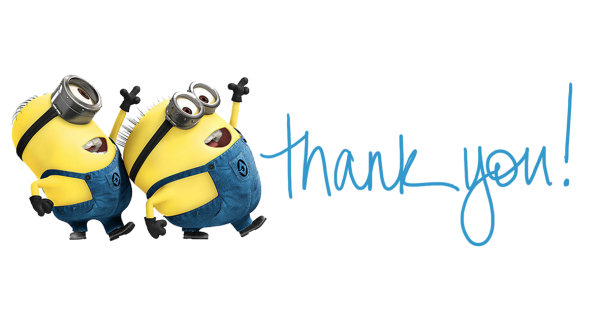